#ForestFires
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')
Assignments21:57


In [6]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [7]:
forest=pd.read_csv("/content/forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [34]:
data = forest.copy()
data.drop(data.columns[11:30],axis=1,inplace = True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [36]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [32]:
data.shape

(517, 12)

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [38]:
data.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [39]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [42]:
data['DMC'].unique()

array([ 26.2,  35.4,  43.7,  33.3,  51.3,  85.3,  88.9, 145.4, 129.5,
        88. ,  73.2,  70.8, 126.5, 133.3, 141.2,  35.8,  32.8,  27.9,
        27.4,  78.5,  96.3, 110.9, 139.4, 142.4, 117.9, 149.3,  85.1,
        91.8,  69.7,  75.6,  80.7,  41.5,  25.7,  60.6,  96.9, 108.3,
        82.9,  62.3,  23.9,  52.2, 137. ,  99.6, 111.2, 114.3,  46.5,
         9.3,  13.2,  75.3, 103.2,  48.3, 147.3,   6.8, 108. , 121.2,
        90. ,   8. ,   2.4, 121.1,   3.7,  19.5,  30.7,  39.7, 124.1,
        73.4,  37.9,  21.5,  80.9,  99.9, 131.7,  56.4,  68.6,  51.2,
        50.1,  18.2, 127.1,  90.4,   9.1,  15.6,  48.5, 135.7,  41.9,
        44. ,  37.6,   8.7, 150.3,  81.8,   3. ,  17.2,  23.3, 122.3,
       175.1,  91.6, 157.3, 109.2, 138.1,  77. , 117.2, 170.9,  97.9,
       112.4, 141.1, 167.6, 102.2, 152.6,  27.2,  27.8,  26.4,  25.4,
        26.7,  27.5,   6.6,   4.9, 169.7, 183.1, 104.2, 100.2, 180.4,
        88.8,  89.5, 147.8,  71. ,  93.3,  94.1,  28. ,  84.1, 105.8,
        46.2, 115.4,

In [43]:
data['DMC'].value_counts()

99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

In [44]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [46]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [47]:
data.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001


In [40]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data.month= label_encoder.fit_transform(data.month)
data.day= label_encoder.fit_transform(data.day)
data.size_category= label_encoder.fit_transform(data.size_category)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [48]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [49]:
resamp = data.copy()

In [50]:
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

In [51]:
print(Counter(b))

Counter({1: 378, 0: 139})


In [52]:
smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)


In [53]:
print(Counter(b)) #removed bias in dataset

Counter({1: 374, 0: 374})


In [54]:
# Splitting the data into train and test
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [55]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [56]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 0.6945 - accuracy: 0.5143 - val_loss: 0.6872 - val_accuracy: 0.5838
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.6029 - val_loss: 0.6767 - val_accuracy: 0.5665
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.5971 - val_loss: 0.6646 - val_accuracy: 0.5549
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.5629 - val_loss: 0.6188 - val_accuracy: 0.5607
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7114 - val_loss: 0.5620 - val_accuracy: 0.7572
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.8629 - val_loss: 0.4457 - val_accuracy: 0.8844
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3551 - accuracy: 0.9314 - val_loss: 0.3447 - val_accuracy: 0.8844
Epoch 8/50
35/35 [==

In [58]:
print(hist.history.keys())
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


,loss,accuracy,val_loss,val_accuracy,epoch
45,0.045738,0.977143,0.024001,0.982659,45
46,0.060664,0.971429,0.028980,0.994220,46
47,0.140644,0.957143,0.026649,0.994220,47
48,0.039021,0.980000,0.025143,0.994220,48
49,0.047416,0.982857,0.055571,0.982659,49


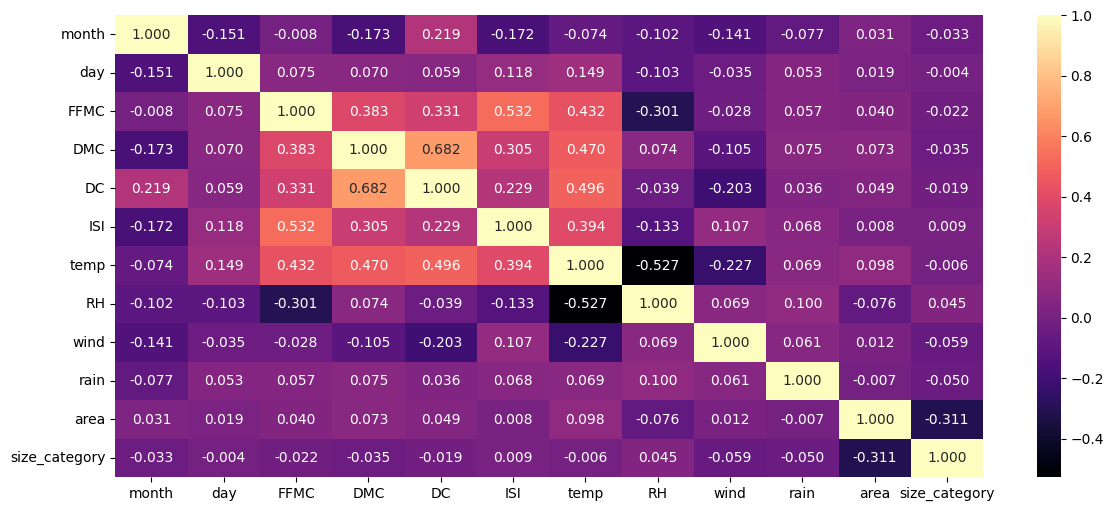

In [59]:
# Heatmap
plt.figure(figsize = (14, 6));
sns.heatmap(data.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

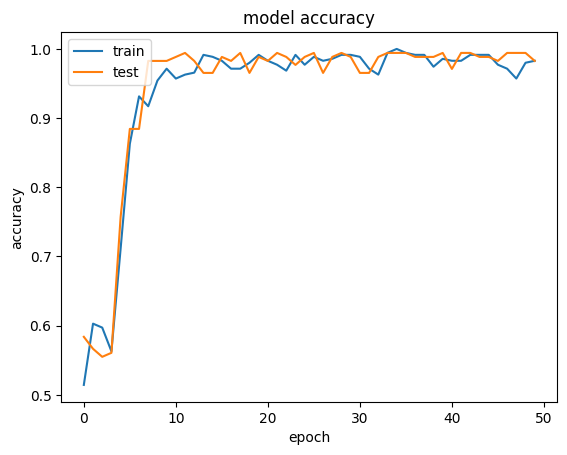

In [60]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

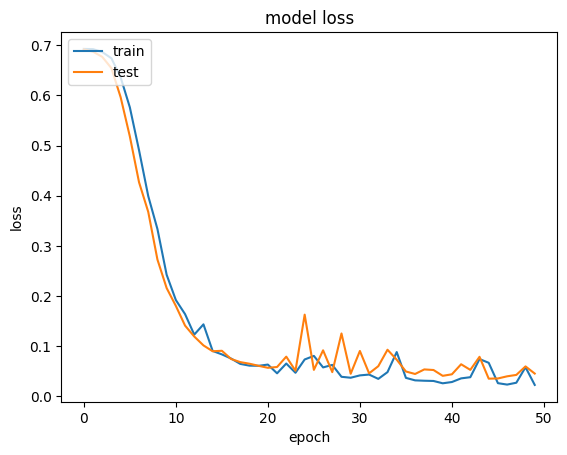

In [29]:
#summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

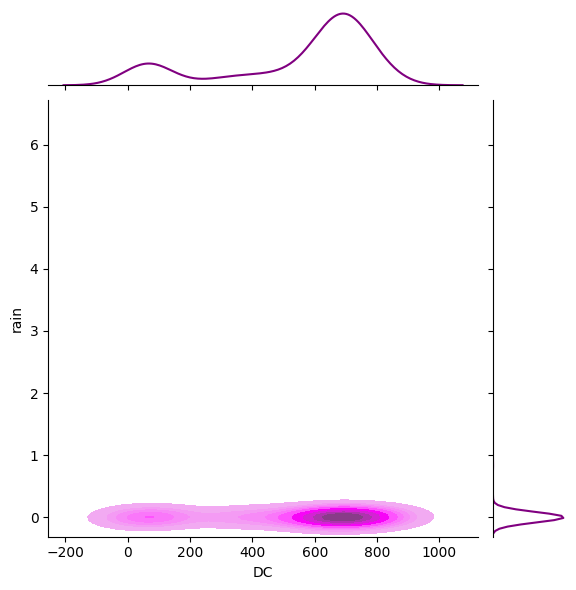

In [61]:
sns.jointplot(x = 'DC', y='rain', data = data, kind= 'kde', shade = True, color = 'purple')
plt.show()

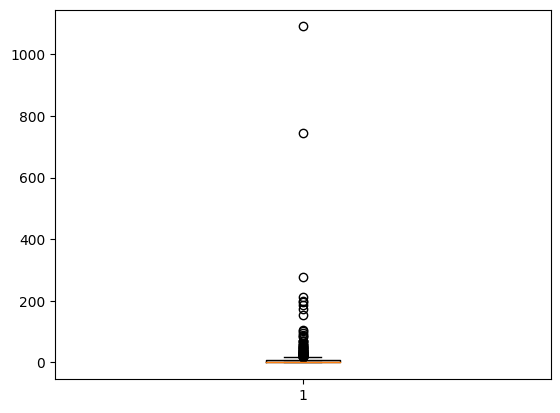

In [62]:
plt.boxplot(data['area'])
plt.show()

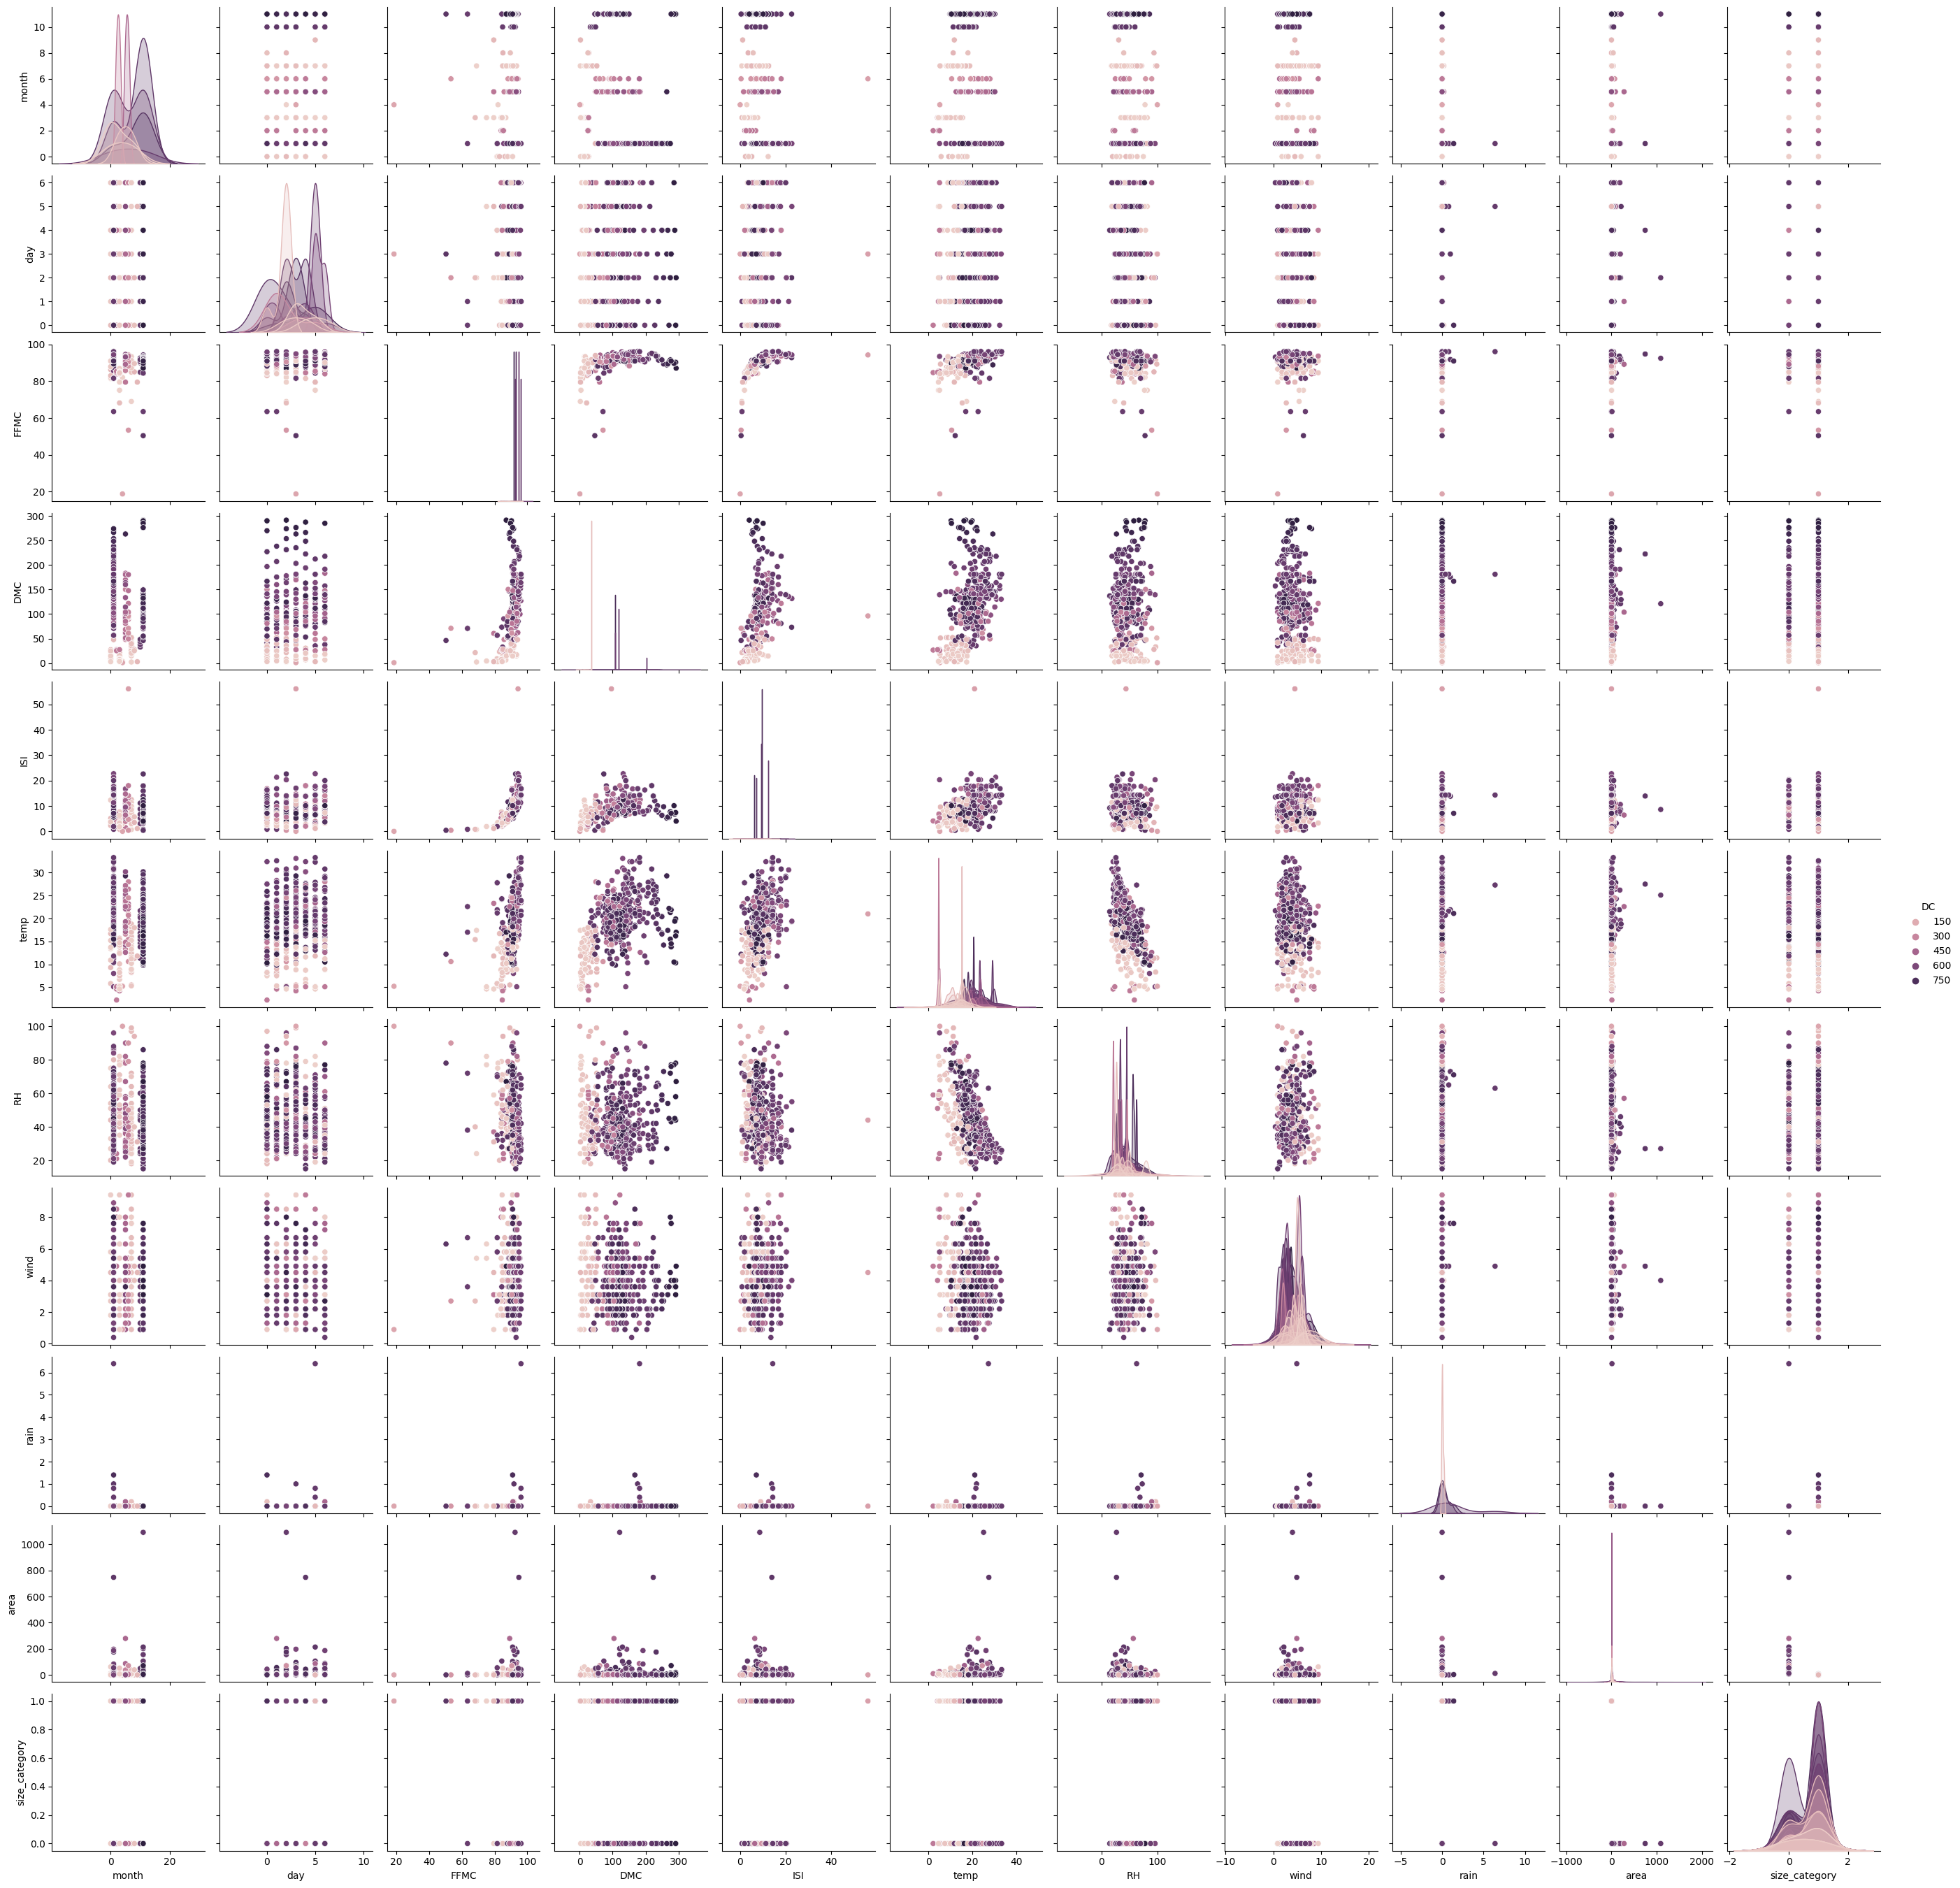

In [64]:
sns.pairplot(data,hue='DC')
plt.show()

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                168       
                                                                 
 dense_4 (Dense)             (None, 12)                180       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [77]:
#predicting  on test data
preds=model.predict(X_test)
X_test.value_counts()


8/8 [==============================] - 0s 4ms/step


month  day  FFMC       DMC         DC         ISI       temp       RH  wind  rain  area     
0      3    81.900000  3.000000    7.90000    3.500000  13.400000  75  1.8   0.0   0.000000     1
6      0    91.100000  94.100000   232.10000  7.100000  19.200000  38  4.5   0.0   0.000000     1
10     2    90.600000  43.700000   686.90000  6.700000  14.600000  33  1.3   0.0   0.000000     1
       5    90.600000  35.400000   669.10000  6.700000  18.000000  33  0.9   0.0   0.000000     1
       6    91.400000  37.900000   673.80000  5.200000  15.900000  46  3.6   0.0   0.000000     1
                                                                                               ..
2      1    85.051858  26.026656   351.02294  4.062197  4.669628   33  8.5   0.0   10.120751    1
            85.400000  25.400000   349.70000  2.600000  4.600000   21  8.5   0.0   16.486596    1
                                                                                   16.534793    1
                         

In [71]:
y_test.value_counts()

1    123
0    102
Name: size_category, dtype: int64

In [74]:
preds

array([[2.5053478e-07],
       [1.2733518e-02],
       [9.9858528e-01],
       [0.0000000e+00],
       [9.9951661e-01],
       [9.9994558e-01],
       [1.7676428e-02],
       [9.9998653e-01],
       [9.9997532e-01],
       [9.9980265e-01],
       [1.6748594e-04],
       [1.6693941e-11],
       [9.9997741e-01],
       [7.5973433e-01],
       [9.9995464e-01],
       [9.9973786e-01],
       [8.2972020e-09],
       [7.6041484e-01],
       [3.3224168e-20],
       [4.4272208e-05],
       [3.2531711e-15],
       [8.2702570e-02],
       [9.9988168e-01],
       [5.3095910e-09],
       [9.9996841e-01],
       [9.9991858e-01],
       [2.5291477e-06],
       [1.1692736e-05],
       [9.9972314e-01],
       [9.9992174e-01],
       [9.9988246e-01],
       [9.9915195e-01],
       [9.9997455e-01],
       [9.9995667e-01],
       [9.9532497e-01],
       [9.9997199e-01],
       [7.9170191e-01],
       [9.9993336e-01],
       [9.9994552e-01],
       [9.5121050e-06],
       [2.8980949e-07],
       [9.982757